## 1. Введение



Все любят Лего (только если вы не наступили на него). Компания LEGO Group была основана в 1932 году, датчанином Оле Кирк Кристиансен. Вначале это была небольшая команда из 7 человек, которая поставила перед собой задачу создать игрушку, развивающая воображение, изобретательность и творческие способности ребенка.

Основным продуктом компании LEGO являются разноцветные пластмассовые кирпичики, из которых можно собрать разнообразные объекты от зданий до движущихся роботов. 

В этом проекте будет проанализирован набор данных, содержащий абсолютно все блоки, когда-либо выпускаемые и используемые в игровых наборах Lego.

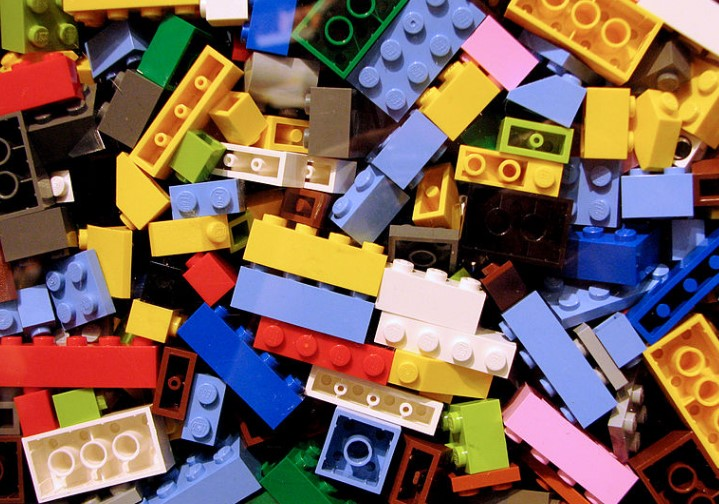

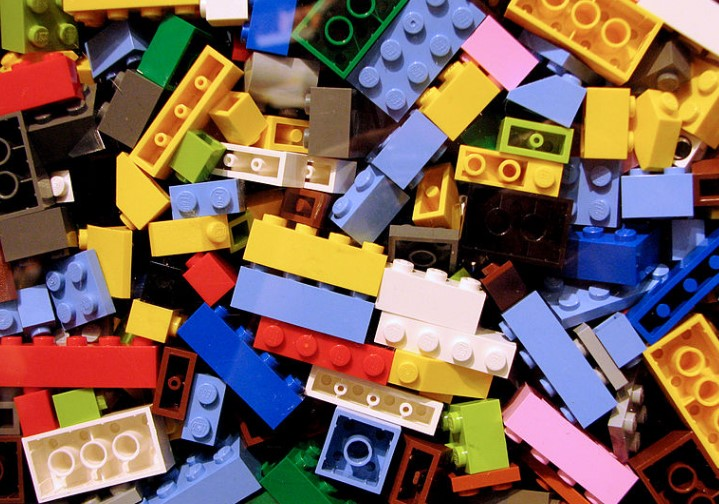

## 2. Чтение данных

Данные о блоках Lego предоставлены  Rebrickable (https://rebrickable.com/downloads/). Данные можно скачать в виде csv файлов. Структура данных представлена на сайте. 

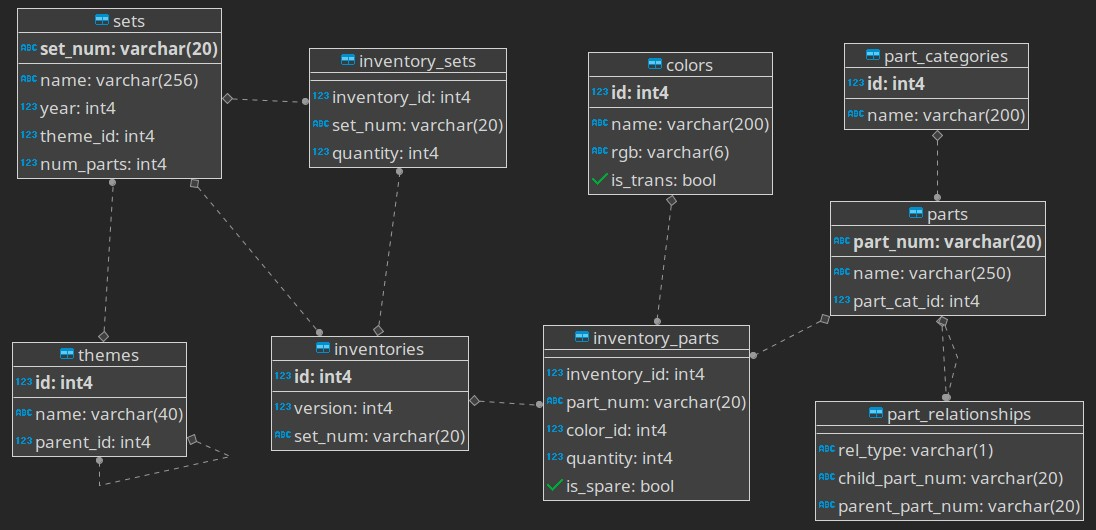

Считаем данные о цветах блоков, чтобы получить представление обо всем разнообразии наборов Lego.

In [1]:
import pandas as pd
colors = pd.read_csv('colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Исследование цветов 

Когда мы считали данные о цветах, узнаем сколько цветов и оттенков использует Lego для расскрашивания блоков.

In [2]:
num_colors=colors.shape
num_colors

(184, 4)

Количество уникальных цветов используемых для расскрашивания блоков, компанией Lego - 184.

## 4. Прозрачные цвета блоков

Помимо матовых блоков, существуют также прозрачные.

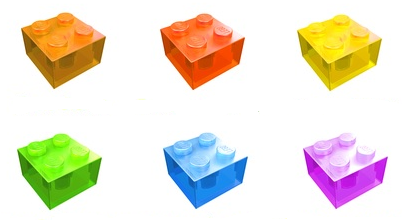

Данные о прозрачности блока содержатся в столбце is_trans. Соответственно f - не прозрачный, t - прозрачный. Интересно, какое соотношение между ними.

In [3]:
colors_summary=colors.groupby(by=['is_trans']).count()
colors_summary

,id,name,rgb
is_trans,,,
f,151,151,151
t,33,33,33


Соотношение между не прозрачными и прозрачными блоками составляет приблизительно 5:1.

## 5. Изучение наборов Lego 

Другой интересный набор данных, который есть в доступе на сайте, содержит список наборов по годам и количеству используемых частей.

In [4]:
set=pd.read_csv('sets_1.csv')
set.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


Сгруппируем данные и посмотрим как среднее количество деталей в наборах менялось с годами.

In [5]:
parts_by_year=set[['year', 'num_parts']].groupby(by='year',as_index=False).mean()
parts_by_year.head()

,year,num_parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143


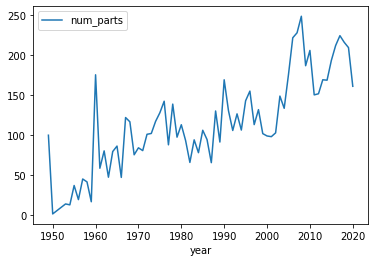

In [6]:
%matplotlib inline
parts_by_year.plot(x='year', y='num_parts')

На графике наглядно видно, как с годами менялось среднее количество деталей в наборе.

## 6. Lego темы на протяжении многих лет

Наборы лего имеют невероятное разнообразие. Они делятся как по рекомендуемому возрасту, так и различной тематике. В лего можно собрать как целый город, так и машину, космический корабль, множество невероятных героев из знаменитых фильмов. А если Вам нравятся динозавры, то и там можно создать целую площадку. 

Независимо от возраста, любой взрослый и ребенок сможет найти для себя интересную тему в наборе. Хотите вы построить замок или деревню, перенести Minecraft с экрана планшета/компьютера к себе на стол, Lego Вам предоставит такую возможность.

Посмотрим количество тем используемых в наборах на протяжении нескольких лет.

In [7]:
themes_by_year=set[['year','theme_id']].groupby(by='year',as_index=False).agg({"theme_id": pd.Series.count})
themes_by_year.head()

,year,theme_id
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,28


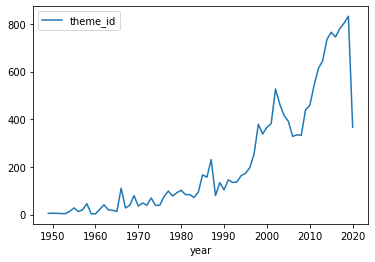

In [8]:
themes_by_year.plot(x='year', y='theme_id')

Посмотрим название самых распостраненных тем в наборах.

In [9]:
themes=pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [10]:
themes.name.value_counts().head(10)

Supplemental    18
Airport         10
Traffic          9
Castle           9
Fire             9
Harbor           8
Construction     8
Police           7
Pirates          7
Train            6
Name: name, dtype: int64

Supplemental - подсерия конструктора LEGO (ЛЕГО) из основной серии Универсальный строительный набор (Universal Building Set). Не удивительно, что в этой подсерии наибольшее количество наборов, т.к. она представляет собой дополнительные блоки и фигурки к основным наборам.

## 7. Заключение

Блоки Lego представляют собой просто уникальное пространство для воображения и творчества. На протяжении нескольких десятелей наборы этой компании не оставляют никого равнодушными, они позволяют погружаться в различные ситуации, охватывают невообразимые темы, чтобы каждый смог найти себе набор по интересу. В ходе проекта исследовали некоторые интересные тенденции вокруг цвета, деталей и тем. 